<a href="https://colab.research.google.com/github/mkbahk/QuantumComputing/blob/main/Matrix_to_Wave_20240717.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!python3 -m pip install qiskit[visualization]==1.0.2
!python3 -m pip install qiskit-ionq==0.5.2
!python3 -m pip install qiskit-ibm-provider==0.11.0
!python3 -m pip install qiskit-aer==0.14.2
!python3 -m pip install git+https://github.com/qiskit-community/qiskit-textbook.git#subdirectory=qiskit-textbook-src

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 22.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 7.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.7/49.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 18.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 162.6/162.6 kB 14.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 6.9 MB/s eta 0:00:00
  Created wheel for pylatexenc: filename=pylatexenc-2.10-py3-none-any.whl size=136816 sha256=d48772c21c02b0e4376b5b0d2e63471c7b54a8532350a1e6f6c8c52b936abf29
  Stored in directory: /root/.cache/pip/wheels/d3/31/8b/e09b0386afd80cfc556c00408c9aeea5c35c4d484a9c762fd5
Successfully built pylatexenc
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.2/40.2 kB 1.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━

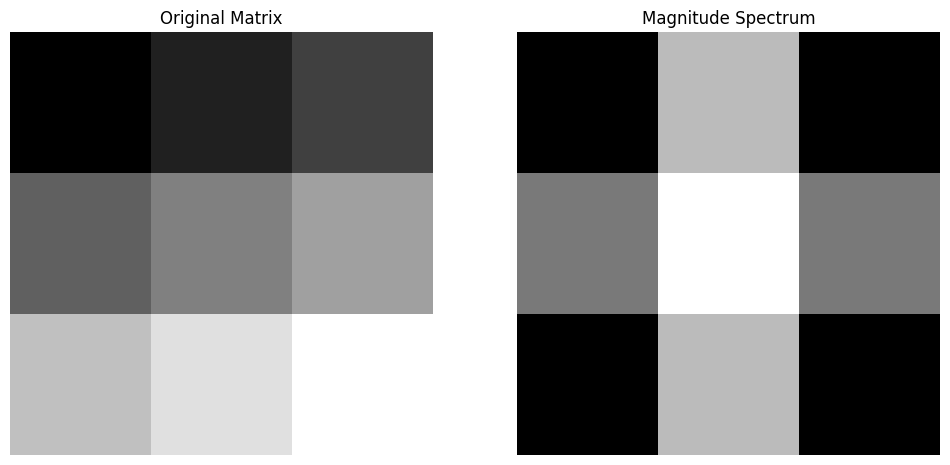

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# 임의의 2D 행렬 생성
matrix = np.random.random((256, 256))
#matrix = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 2D DFT 적용
dft_matrix = np.fft.fft2(matrix)

# 주파수 성분을 시각화하기 위해 중앙으로 이동
dft_shifted = np.fft.fftshift(dft_matrix)
magnitude_spectrum = np.log(np.abs(dft_shifted) + 1)

# 원본 행렬과 주파수 스펙트럼 시각화
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Original Matrix')
plt.imshow(matrix, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Magnitude Spectrum')
plt.imshow(magnitude_spectrum, cmap='gray')
plt.axis('off')

plt.show()

In [3]:

import numpy as np

# 행렬 생성
A = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])

# 복수 행렬로 변환
B = A.astype(complex)

# 푸리에 변환
C = np.fft.fft2(B)

# 절대값 계산
magnitude = np.abs(C)

# 각도 계산
phase = np.angle(C)

# 결과 출력
print("절대값:")
print(magnitude)
print("\n각도:")
print(phase)

절대값:
[[45.          5.19615242  5.19615242]
 [15.58845727  0.          0.        ]
 [15.58845727  0.          0.        ]]

각도:
[[ 0.          2.61799388 -2.61799388]
 [ 2.61799388  0.          0.        ]
 [-2.61799388  0.          0.        ]]


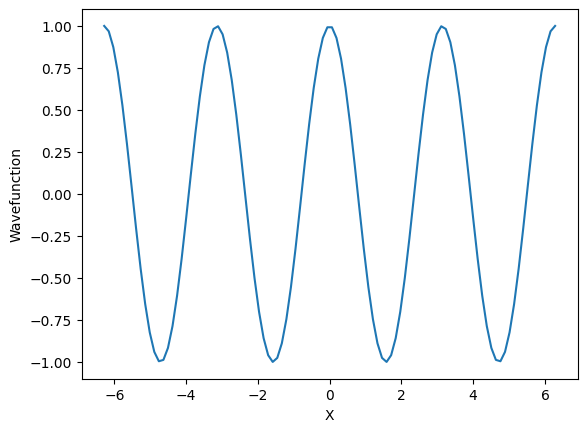

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# 파동 매개변수 설정
wavelength = 2 * np.pi  # 파장
amplitude = 1  # 진폭
phase = 0  # 위상
k = 2 * np.pi / wavelength  # 파수 벡터
x = np.linspace(-wavelength, wavelength, 100)  # 공간 좌표

# 초기 복소 행렬 생성
wavefunction = amplitude * np.exp(1j * (k * x + phase))

# 파동 진행 시뮬레이션 (예: 100 단계)
for _ in range(100):
    wavefunction *= np.exp(1j * k * x)

# 파동 시각화
plt.plot(x, np.real(wavefunction))  # 실수 부분 사용
plt.xlabel('X')
plt.ylabel('Wavefunction')
plt.show()


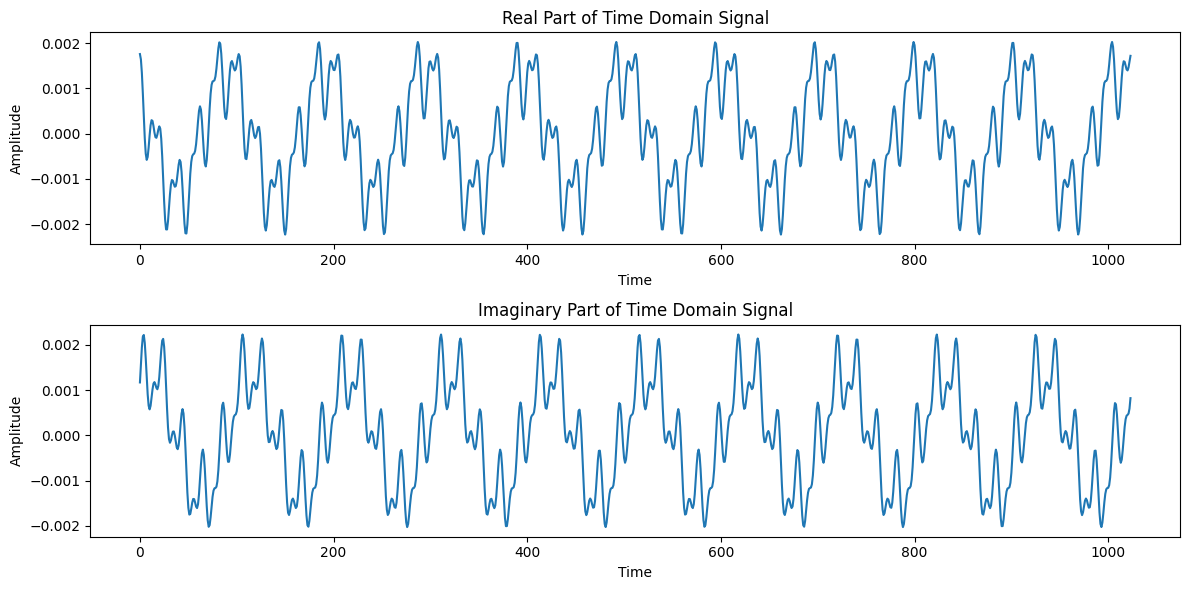

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Create a complex matrix (frequency components)
# Let's create a simple example with a few frequency components
freq_components = np.zeros(1024, dtype=complex)
freq_components[10] = 1 + 1j  # Frequency component at index 10
freq_components[50] = 0.5 * (1 + 1j)  # Frequency component at index 50
freq_components[100] = 0.3 * (1 - 1j)  # Frequency component at index 100

# Step 2: Perform the inverse Fourier transform to get the time-domain signal
time_domain_signal = np.fft.ifft(freq_components)

# Step 3: Plot the real and imaginary parts of the time-domain signal
plt.figure(figsize=(12, 6))

# Real part of the signal
plt.subplot(2, 1, 1)
plt.plot(time_domain_signal.real)
plt.title('Real Part of Time Domain Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

# Imaginary part of the signal
plt.subplot(2, 1, 2)
plt.plot(time_domain_signal.imag)
plt.title('Imaginary Part of Time Domain Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')

plt.tight_layout()
plt.show()


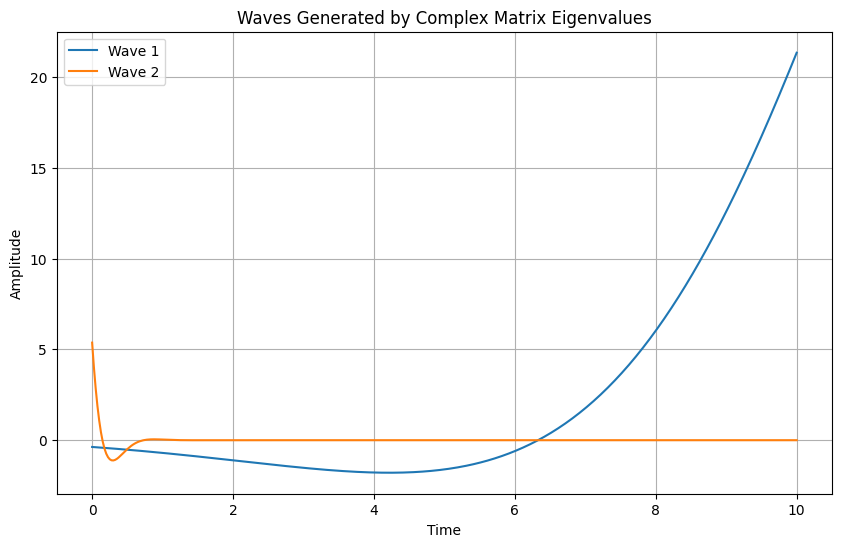

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# 복소수 행렬 생성
A = np.array([[1+1j, 2+2j], [3+3j, 4+4j]])

# 고유값과 고유벡터 계산
eigenvalues, eigenvectors = np.linalg.eig(A)

# 시간 벡터 생성
t = np.linspace(0, 10, 400)

# 파형 생성 (고유값을 이용한 진동 모드)
wave1 = np.real(eigenvalues[0] * np.exp(1j * eigenvalues[0] * t))
wave2 = np.real(eigenvalues[1] * np.exp(1j * eigenvalues[1] * t))

# 파형 플롯
plt.figure(figsize=(10, 6))
plt.plot(t, wave1, label='Wave 1')
plt.plot(t, wave2, label='Wave 2')
plt.title('Waves Generated by Complex Matrix Eigenvalues')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()
